# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Jakob Knoblach

Datum: 15.11.2023

Gruppe: 29

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie bestimme ich die Wärmekapazität des Behälters mit kaltem Wasser?

## Versuchsaufbau und Durchführung

Ich habe mir für die Versuchsdurchführung eine blaue Schüssel (rechts) und eine normal Tasse (links) zur Hand genommen. In der Schüssel befinden sich 200ml kaltes Wasser und in der Tasse befinden sich 165ml warmes Wasser. Nun hänge ich in jeweils ein Gefäß einen Sensor und starte mein main.py. Nachdem das Programm gestartet wurde kippte ich das Wasser in die Schüssel (inkl. Sensor) und rührte mit einer Gabel darin herum.



<img src="figures/IMG_0692.jpg" width="800">

## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path_capacity = "Versuch_heat_capacity/Versuch_heat_capacity.h5"

# DONE #

In [3]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
import h5py as h5
import numpy as np
with h5.File(path_capacity) as f:
    
    temperature_sensor_1 = f["RawData/1ee7d4bf-3320-694f-bec8-88f2cd5b781a/temperature"]
    timestamp_sensor_1 = f["RawData/1ee7d4bf-3320-694f-bec8-88f2cd5b781a/timestamp"]
    temperature_sensor_2 = f["RawData/1ee7d4c0-eb4f-6204-b90b-7ecfb9fc03f9/temperature"]
    timestamp_sensor_2 = f["RawData/1ee7d4c0-eb4f-6204-b90b-7ecfb9fc03f9/timestamp"]
    
    ts1 = np.array(temperature_sensor_1)
    time1 = np.array(timestamp_sensor_1)
    ts2 = np.array(temperature_sensor_2)
    time2 = np.array(timestamp_sensor_2)
    
#import os
#os.listdir()
#fn = 'Versuch_heat_capacity.h5'
#list(temperature_sensor_1.keys())
# DONE #

#### (ii) Daten ploten

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


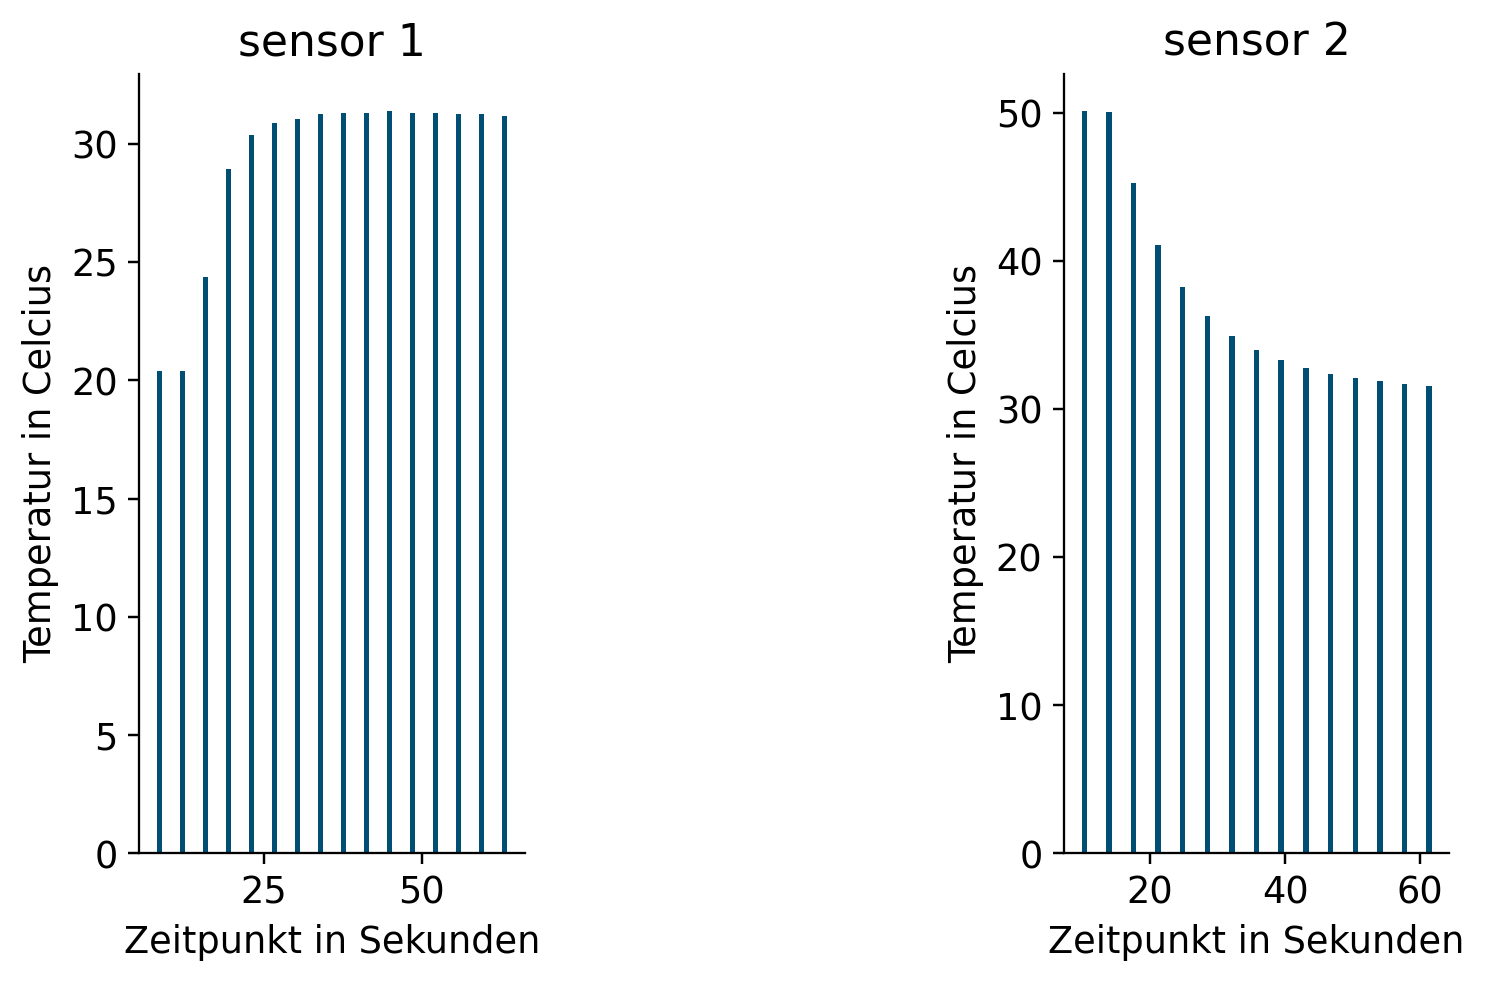

In [4]:
# TODO: Use the temperature and time data for plotting
import matplotlib.pyplot as plt
 
plt.subplot(1,3,1)
plt.bar(time1,ts1)
plt.title("sensor 1")
plt.xlabel("Zeitpunkt in Sekunden")
plt.ylabel("Temperatur in Celcius")

plt.subplot(1,3,3)
plt.bar(time2, ts2)
plt.title("sensor 2")
plt.xlabel("Zeitpunkt in Sekunden")
plt.ylabel("Temperatur in Celcius")


plt.subplots_adjust(left = 0.01)

#plt.savefig("KPIPlot.svg", format="svg")

# DONE #

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [5]:
# Heat capacity of Water
water_heat_capa = 4.18

# TODO: Read mass from the metadata of the experiment.
import json
with open("Versuch_heat_capacity/probe_heat_capacity_1ee7d4db-38b0-608d-9b5b-3669d4319eeb.json") as jf:
        g = json.load(jf)
        
mass = g['probe']['metadata']
print(mass)
# DONE #

Masse Wasser Warm = 165ml, Masse Wasser Kalt = 200ml


#### (iV) Anfangs- und Endwert der Temperatur

In [6]:
# TODO: Calculation of temperature data necessary to determine the specific heat capacity
t2 = ts2[0]
tm = ts1[9]
t1 = ts1[0]

# DONE #

#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [7]:
# TODO: Calculate heat capacity of the calorimeter
Capacity_c = ((165*water_heat_capa*(t2-tm))/(tm-t1))-200*water_heat_capa

# DONE #

#### (Vi) Ergebnis

In [8]:
# TODO: Print result

print(Capacity_c)
# DONE #

350.2839999999999


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität meines Behälters beträg ungefähr 350 J/K.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Ich weis jetzt wie man mit HDF5 Daten arbeitet und diese auch verarbeitet.